In [81]:
from probatus.feature_elimination import ShapRFECV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import numpy as np
import pandas as pd
import lightgbm
from sklearn.model_selection import RandomizedSearchCV

# Prepare two samples
X, y = make_classification(n_samples=2000, class_sep=0.05, n_informative=20, n_features=1156,
                           random_state=0, n_redundant=4, n_clusters_per_class=1)



In [189]:
X_train = pd.DataFrame(X)
X_train["bool_feature"] = X_train.iloc[:, 0] > 0.5

In [85]:
y_train = np.where(y == 1, "yes", "no")

In [86]:
clf = CatBoostClassifier(n_estimators=1000, verbose=0)


In [87]:
shap_elimination = ShapRFECV(
    clf=clf, step=0.5, min_features_to_select=20, cv=3, scoring='roc_auc', n_jobs=3, verbose=51)
report = shap_elimination.fit_compute(X, y_train)

 98%|===================| 656/666 [00:23<00:00]        

Round: 1, Current number of features: 1156, Current performance: Train 1.0 +/- 0.0, CV Validation 0.948 +/- 0.002. 
Features left: [0, 2, 3, 4, 6, 7, 10, 12, 13, 14, 18, 19, 22, 23, 25, 26, 27, 29, 32, 33, 34, 35, 36, 37, 41, 42, 45, 49, 51, 52, 53, 55, 60, 61, 70, 71, 72, 77, 78, 82, 85, 88, 90, 92, 97, 99, 101, 106, 107, 110, 112, 113, 116, 117, 118, 119, 120, 121, 125, 127, 133, 134, 138, 141, 143, 144, 145, 146, 147, 149, 150, 152, 154, 157, 158, 159, 163, 164, 169, 171, 172, 180, 181, 182, 183, 184, 185, 187, 189, 191, 195, 197, 198, 199, 200, 201, 203, 205, 206, 207, 209, 212, 213, 214, 219, 221, 223, 224, 225, 226, 227, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 240, 241, 242, 248, 250, 253, 257, 260, 261, 262, 264, 265, 268, 270, 271, 273, 275, 277, 279, 280, 281, 282, 284, 286, 288, 289, 293, 294, 295, 296, 297, 299, 300, 301, 302, 304, 305, 308, 310, 312, 313, 315, 316, 317, 318, 319, 321, 322, 323, 324, 326, 328, 331, 332, 333, 334, 335, 336, 341, 344, 345, 348, 349, 

 99%|===================| 657/667 [00:23<00:00]        

Round: 2, Current number of features: 578, Current performance: Train 1.0 +/- 0.0, CV Validation 0.957 +/- 0.001. 
Features left: [0, 512, 2, 3, 516, 1025, 1030, 10, 522, 12, 523, 524, 526, 528, 1035, 530, 19, 1036, 533, 22, 23, 25, 539, 540, 1052, 542, 1055, 1056, 33, 34, 35, 545, 547, 548, 549, 1064, 41, 42, 554, 555, 45, 558, 559, 1066, 49, 561, 51, 52, 53, 564, 1075, 1077, 1078, 1079, 1083, 1087, 576, 1091, 70, 585, 1097, 589, 78, 590, 1104, 593, 82, 594, 1106, 1112, 90, 1114, 606, 1120, 609, 1121, 99, 611, 612, 1038, 106, 618, 619, 621, 1132, 623, 112, 113, 1134, 627, 1135, 117, 120, 121, 632, 125, 644, 645, 134, 646, 138, 141, 143, 144, 655, 656, 659, 660, 149, 152, 667, 158, 675, 164, 677, 678, 171, 172, 683, 183, 184, 185, 696, 187, 697, 191, 705, 195, 708, 197, 709, 199, 200, 711, 713, 203, 717, 720, 724, 213, 214, 729, 224, 225, 227, 229, 234, 236, 749, 751, 241, 242, 753, 761, 250, 764, 766, 767, 261, 773, 264, 265, 776, 778, 780, 783, 787, 277, 791, 281, 794, 284, 286, 801,

100%|===================| 665/666 [00:22<00:00]        

Round: 3, Current number of features: 289, Current performance: Train 1.0 +/- 0.0, CV Validation 0.964 +/- 0.003. 
Features left: [512, 1025, 3, 516, 1030, 10, 522, 523, 524, 1035, 1038, 530, 22, 23, 1052, 540, 542, 1056, 545, 34, 547, 549, 1066, 45, 558, 49, 1075, 1079, 1083, 1087, 576, 1091, 70, 585, 1097, 589, 78, 590, 1104, 593, 594, 90, 1114, 99, 611, 106, 619, 621, 1134, 623, 112, 1135, 627, 117, 120, 121, 645, 134, 646, 138, 141, 655, 656, 164, 678, 171, 183, 696, 191, 705, 197, 709, 199, 200, 713, 203, 213, 234, 749, 241, 242, 250, 764, 767, 264, 265, 780, 783, 787, 277, 791, 281, 284, 801, 293, 297, 812, 301, 818, 826, 319, 321, 834, 835, 336, 850, 851, 344, 864, 354, 366, 883, 377, 891, 387, 390, 394, 396, 400, 912, 914, 405, 928, 420, 933, 944, 950, 448, 449, 454, 966, 458, 972, 975, 465, 468, 474, 995, 486, 492, 494, 1007, 1009, 1011, 509]. Removed features at the end of the round: [711, 659, 882, 958, 794, 660, 632, 819, 526, 433, 872, 430, 419, 867, 708, 866, 143, 1120, 2

 98%|===================| 654/667 [00:22<00:00]        

Round: 4, Current number of features: 145, Current performance: Train 1.0 +/- 0.0, CV Validation 0.97 +/- 0.001. 
Features left: [387, 516, 645, 134, 390, 265, 138, 1035, 780, 141, 1038, 396, 656, 914, 787, 405, 22, 23, 540, 1056, 801, 34, 928, 164, 549, 420, 297, 812, 301, 944, 49, 818, 1075, 950, 1079, 1083, 319, 448, 834, 1091, 835, 197, 70, 454, 200, 966, 458, 589, 78, 1104, 593, 594, 336, 344, 90, 864, 354, 611, 995, 486, 492, 621, 1134, 494, 1007, 241, 883, 1011, 377, 250, 891, 509, 767]. Removed features at the end of the round: [530, 1030, 576, 627, 10, 933, 523, 972, 713, 512, 542, 120, 783, 293, 213, 366, 524, 696, 585, 1114, 1087, 394, 242, 1097, 121, 1052, 749, 99, 850, 264, 522, 284, 1135, 171, 277, 465, 547, 764, 281, 678, 1066, 655, 545, 826, 234, 199, 590, 1025, 912, 449, 400, 468, 709, 975, 112, 106, 558, 203, 45, 183, 191, 851, 623, 1009, 705, 619, 321, 117, 474, 646, 791, 3]


 97%|=================== | 645/667 [00:22<00:00]       

Round: 5, Current number of features: 73, Current performance: Train 1.0 +/- 0.0, CV Validation 0.977 +/- 0.002. 
Features left: [387, 645, 134, 390, 265, 138, 780, 396, 1038, 914, 22, 540, 1056, 801, 34, 549, 297, 812, 1083, 319, 448, 834, 1091, 197, 70, 454, 966, 344, 90, 354, 611, 492, 621, 494, 883, 250, 509]. Removed features at the end of the round: [594, 241, 767, 301, 928, 49, 944, 420, 200, 1075, 458, 23, 516, 835, 78, 377, 1007, 1134, 818, 995, 405, 1011, 336, 589, 593, 1104, 1079, 164, 656, 486, 1035, 891, 950, 141, 864, 787]


 99%|===================| 662/667 [00:23<00:00]        

Round: 6, Current number of features: 37, Current performance: Train 1.0 +/- 0.0, CV Validation 0.982 +/- 0.003. 
Features left: [387, 134, 390, 265, 914, 22, 1056, 801, 297, 1083, 448, 834, 1091, 966, 344, 611, 492, 883, 250, 509]. Removed features at the end of the round: [621, 1038, 197, 138, 319, 396, 90, 540, 812, 34, 645, 494, 354, 454, 70, 549, 780]


 98%|===================| 652/667 [00:22<00:00]        

Round: 7, Current number of features: 20, Current performance: Train 1.0 +/- 0.0, CV Validation 0.982 +/- 0.004. 
Features left: [448, 834, 387, 1091, 390, 134, 966, 265, 914, 22, 344, 1056, 801, 611, 297, 492, 883, 250, 1083, 509]. Removed features at the end of the round: []


In [201]:
shap_elimination.

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [193]:
report

,num_features,features_set,eliminated_features,train_metric_mean,train_metric_std,val_metric_mean,val_metric_std,rank
1,1156,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[404, 759, 736, 274, 527, 577, 384, 371, 204, ...",1.0,0.0,0.948,0.002,7
2,578,"[0, 2, 3, 4, 6, 7, 10, 12, 13, 14, 18, 19, 22,...","[1153, 504, 957, 918, 534, 782, 974, 1090, 653...",1.0,0.0,0.957,0.001,6
3,289,"[0, 512, 2, 3, 516, 1025, 1030, 10, 522, 12, 5...","[711, 659, 882, 958, 794, 660, 632, 819, 526, ...",1.0,0.0,0.964,0.003,5
4,145,"[512, 1025, 3, 516, 1030, 10, 522, 523, 524, 1...","[530, 1030, 576, 627, 10, 933, 523, 972, 713, ...",1.0,0.0,0.970,0.001,4
5,73,"[387, 516, 645, 134, 390, 265, 138, 1035, 780,...","[594, 241, 767, 301, 928, 49, 944, 420, 200, 1...",1.0,0.0,0.977,0.002,3
6,37,"[387, 645, 134, 390, 265, 138, 780, 396, 1038,...","[621, 1038, 197, 138, 319, 396, 90, 540, 812, ...",1.0,0.0,0.982,0.003,2
7,20,"[387, 134, 390, 265, 914, 22, 1056, 801, 297, ...",[],1.0,0.0,0.982,0.004,1


In [91]:
report["rank"] = np.flip(report.index)
report

,num_features,features_set,eliminated_features,train_metric_mean,train_metric_std,val_metric_mean,val_metric_std,rank
1,1156,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[404, 759, 736, 274, 527, 577, 384, 371, 204, ...",1.0,0.0,0.948,0.002,7
2,578,"[0, 2, 3, 4, 6, 7, 10, 12, 13, 14, 18, 19, 22,...","[1153, 504, 957, 918, 534, 782, 974, 1090, 653...",1.0,0.0,0.957,0.001,6
3,289,"[0, 512, 2, 3, 516, 1025, 1030, 10, 522, 12, 5...","[711, 659, 882, 958, 794, 660, 632, 819, 526, ...",1.0,0.0,0.964,0.003,5
4,145,"[512, 1025, 3, 516, 1030, 10, 522, 523, 524, 1...","[530, 1030, 576, 627, 10, 933, 523, 972, 713, ...",1.0,0.0,0.970,0.001,4
5,73,"[387, 516, 645, 134, 390, 265, 138, 1035, 780,...","[594, 241, 767, 301, 928, 49, 944, 420, 200, 1...",1.0,0.0,0.977,0.002,3
6,37,"[387, 645, 134, 390, 265, 138, 780, 396, 1038,...","[621, 1038, 197, 138, 319, 396, 90, 540, 812, ...",1.0,0.0,0.982,0.003,2
7,20,"[387, 134, 390, 265, 914, 22, 1056, 801, 297, ...",[],1.0,0.0,0.982,0.004,1


In [194]:
report.iloc[:3]

,num_features,features_set,eliminated_features,train_metric_mean,train_metric_std,val_metric_mean,val_metric_std,rank
1,1156,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[404, 759, 736, 274, 527, 577, 384, 371, 204, ...",1.0,0.0,0.948,0.002,7
2,578,"[0, 2, 3, 4, 6, 7, 10, 12, 13, 14, 18, 19, 22,...","[1153, 504, 957, 918, 534, 782, 974, 1090, 653...",1.0,0.0,0.957,0.001,6
3,289,"[0, 512, 2, 3, 516, 1025, 1030, 10, 522, 12, 5...","[711, 659, 882, 958, 794, 660, 632, 819, 526, ...",1.0,0.0,0.964,0.003,5


In [154]:
for i, r in report.iloc[::-1].iterrows():
    print(r["features_set"])

[387, 134, 390, 265, 914, 22, 1056, 801, 297, 1083, 448, 834, 1091, 966, 344, 611, 492, 883, 250, 509]
[387, 645, 134, 390, 265, 138, 780, 396, 1038, 914, 22, 540, 1056, 801, 34, 549, 297, 812, 1083, 319, 448, 834, 1091, 197, 70, 454, 966, 344, 90, 354, 611, 492, 621, 494, 883, 250, 509]
[387, 516, 645, 134, 390, 265, 138, 1035, 780, 141, 1038, 396, 656, 914, 787, 405, 22, 23, 540, 1056, 801, 34, 928, 164, 549, 420, 297, 812, 301, 944, 49, 818, 1075, 950, 1079, 1083, 319, 448, 834, 1091, 835, 197, 70, 454, 200, 966, 458, 589, 78, 1104, 593, 594, 336, 344, 90, 864, 354, 611, 995, 486, 492, 621, 1134, 494, 1007, 241, 883, 1011, 377, 250, 891, 509, 767]
[512, 1025, 3, 516, 1030, 10, 522, 523, 524, 1035, 1038, 530, 22, 23, 1052, 540, 542, 1056, 545, 34, 547, 549, 1066, 45, 558, 49, 1075, 1079, 1083, 1087, 576, 1091, 70, 585, 1097, 589, 78, 590, 1104, 593, 594, 90, 1114, 99, 611, 106, 619, 621, 1134, 623, 112, 1135, 627, 117, 120, 121, 645, 134, 646, 138, 141, 655, 656, 164, 678, 171, 183, 

In [163]:
def get_feature_rank(report):
    
    df = report.copy()
    df["rank"] = np.flip(df.index)
    df = df.iloc[::-1]
    
    results = []
    
    prev_row_features = []
    
    for i, row in df.iterrows():
        
        current_row_features = row["features_set"]
        remaining_row_features = [v for v in current_row_features if v not in prev_row_features]
        prev_row_features = current_row_features
        
        for f in remaining_row_features:
            results.append([f, row["rank"]])
            
    results_df = pd.DataFrame(data=results, columns=["feature_id", "feature_rank"])
    
    return results_df

    


In [164]:
get_feature_rank(report)

,feature_id,feature_rank
0,387,1
1,134,1
2,390,1
3,265,1
4,914,1
...,...,...
1151,1150,7
1152,1151,7
1153,1152,7
1154,1154,7


In [132]:
feature_rank_df = pd.DataFrame(columns=["feature_id", "feature_rank"])

In [115]:
from collections import defaultdict

def get_feature_rank(report):
    """Returns the ranking of each feature as defined by the iteration it was removed."""
    
    feature_rank = {}
    prev_row = []
    current_row = []
    
    for i, row in report.iterrows():
        
        
        if len(row["eliminated_features"]) > 0:
            print("el rows")

            for i in row["eliminated_features"]:
                feature_rank[i] = r["rank"]
        else:
            print("set rows")
            for i in row["features_set"]:
                feature_rank[i] = r["rank"]
    
    feature_rank_df = pd.DataFrame(data=feature_rank, columns=["feature_id", "feature_rank"])
    
    return feature_rank

In [116]:
get_feature_rank(report)

el rows
el rows
el rows
el rows
el rows
el rows
set rows


{404: 1,
 759: 1,
 736: 1,
 274: 1,
 527: 1,
 577: 1,
 384: 1,
 371: 1,
 204: 1,
 124: 1,
 422: 1,
 63: 1,
 903: 1,
 953: 1,
 799: 1,
 905: 1,
 395: 1,
 148: 1,
 386: 1,
 8: 1,
 518: 1,
 1155: 1,
 1029: 1,
 934: 1,
 16: 1,
 1068: 1,
 81: 1,
 193: 1,
 1116: 1,
 1040: 1,
 472: 1,
 347: 1,
 217: 1,
 979: 1,
 634: 1,
 669: 1,
 846: 1,
 889: 1,
 837: 1,
 252: 1,
 1014: 1,
 702: 1,
 884: 1,
 267: 1,
 91: 1,
 39: 1,
 1003: 1,
 103: 1,
 792: 1,
 639: 1,
 235: 1,
 1086: 1,
 130: 1,
 47: 1,
 434: 1,
 990: 1,
 988: 1,
 298: 1,
 657: 1,
 353: 1,
 369: 1,
 1061: 1,
 168: 1,
 306: 1,
 630: 1,
 59: 1,
 643: 1,
 658: 1,
 1147: 1,
 758: 1,
 65: 1,
 190: 1,
 728: 1,
 784: 1,
 1103: 1,
 194: 1,
 1133: 1,
 616: 1,
 208: 1,
 789: 1,
 327: 1,
 84: 1,
 50: 1,
 515: 1,
 391: 1,
 923: 1,
 983: 1,
 437: 1,
 1017: 1,
 24: 1,
 83: 1,
 830: 1,
 1042: 1,
 393: 1,
 1117: 1,
 431: 1,
 1048: 1,
 416: 1,
 292: 1,
 557: 1,
 807: 1,
 339: 1,
 940: 1,
 1005: 1,
 464: 1,
 1143: 1,
 1051: 1,
 620: 1,
 994: 1,
 1124: 1,
 392

In [ ]:
def get_feature_rank(shap_report):
    

In [30]:
best_iteration_idx = report["val_metric_mean"].argmax()
best_num_features = report["num_features"].iloc[best_iteration_idx]
best_feature_names = shap_elimination.get_reduced_features_set(best_num_features)
best_feature_names

[0,
 642,
 258,
 4,
 773,
 262,
 519,
 777,
 394,
 781,
 14,
 656,
 275,
 795,
 541,
 927,
 32,
 676,
 292,
 804,
 551,
 167,
 421,
 811,
 301,
 694,
 823,
 66,
 322,
 836,
 962,
 330,
 75,
 460,
 718,
 847,
 208,
 849,
 977,
 466,
 724,
 725,
 727,
 600,
 217,
 855,
 93,
 349,
 351,
 989,
 478,
 867,
 745,
 361,
 236,
 750,
 623,
 754,
 243,
 499,
 629,
 380,
 638]

In [23]:
report["num_features"].iloc[3]

11

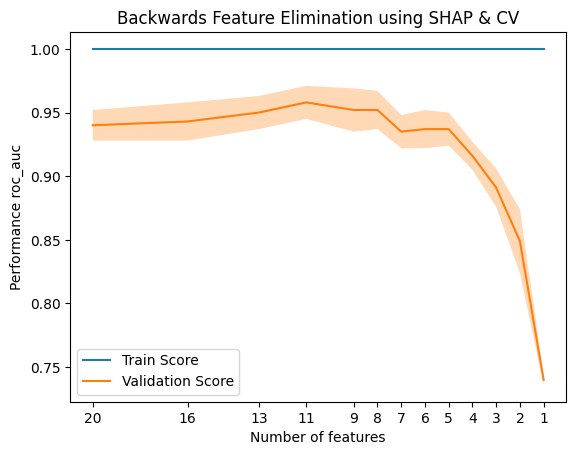

In [6]:
performance_plot = shap_elimination.plot()

In [7]:
shap_elimination.

TypeError: ShapRFECV.get_reduced_features_set() missing 1 required positional argument: 'num_features'

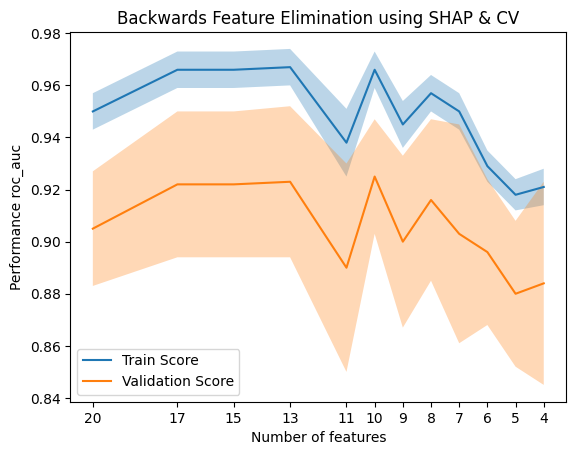

In [14]:
shap_elimination = ShapRFECV(
    clf=search, step=0.2, cv=10, scoring='roc_auc', n_jobs=3, min_features_to_select=4)
report = shap_elimination.fit_compute(X, y, columns_to_keep=['f10','f15','f19'])

performance_plot = shap_elimination.plot()


In [17]:
shap_elimination.clf.

{'cv': None,
 'error_score': nan,
 'estimator__boosting_type': 'gbdt',
 'estimator__class_weight': 'balanced',
 'estimator__colsample_bytree': 1.0,
 'estimator__importance_type': 'split',
 'estimator__learning_rate': 0.1,
 'estimator__max_depth': 5,
 'estimator__min_child_samples': 20,
 'estimator__min_child_weight': 0.001,
 'estimator__min_split_gain': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': -1,
 'estimator__num_leaves': 31,
 'estimator__objective': None,
 'estimator__random_state': None,
 'estimator__reg_alpha': 0.0,
 'estimator__reg_lambda': 0.0,
 'estimator__silent': 'warn',
 'estimator__subsample': 1.0,
 'estimator__subsample_for_bin': 200000,
 'estimator__subsample_freq': 0,
 'estimator': LGBMClassifier(class_weight='balanced', max_depth=5),
 'n_iter': 10,
 'n_jobs': None,
 'param_distributions': {'n_estimators': [5, 7, 10],
  'num_leaves': [3, 5, 7, 10]},
 'pre_dispatch': '2*n_jobs',
 'random_state': None,
 'refit': True,
 'return_train_score': False,
 'scori

In [42]:
from sklearn.feature_selection import RFECV

In [44]:
rfecv = RFECV(clf, step=0.2, cv=5, scoring='roc_auc', verbose=2)
rfecv.fit(X, y)

Fitting estimator with 20 features.
Fitting estimator with 16 features.
Fitting estimator with 12 features.
Fitting estimator with 8 features.
Fitting estimator with 4 features.
Fitting estimator with 20 features.
Fitting estimator with 16 features.
Fitting estimator with 12 features.
Fitting estimator with 8 features.
Fitting estimator with 4 features.
Fitting estimator with 20 features.
Fitting estimator with 16 features.
Fitting estimator with 12 features.
Fitting estimator with 8 features.
Fitting estimator with 4 features.
Fitting estimator with 20 features.
Fitting estimator with 16 features.
Fitting estimator with 12 features.
Fitting estimator with 8 features.
Fitting estimator with 4 features.
Fitting estimator with 20 features.
Fitting estimator with 16 features.
Fitting estimator with 12 features.
Fitting estimator with 8 features.
Fitting estimator with 4 features.
Fitting estimator with 20 features.
Fitting estimator with 16 features.
Fitting estimator with 12 features.


RFECV(cv=5, estimator=RandomForestClassifier(n_estimators=1000),
      scoring='roc_auc', step=0.2, verbose=2)

In [167]:
report["num_features"].sort_values()

7      20
6      37
5      73
4     145
3     289
2     578
1    1156
Name: num_features, dtype: int64

In [186]:
np.random.randint(1, 8)

1

In [206]:
report

,num_features,features_set,eliminated_features,train_metric_mean,train_metric_std,val_metric_mean,val_metric_std,rank,lower_bound_val_metric
1,1156,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[404, 759, 736, 274, 527, 577, 384, 371, 204, ...",1.0,0.0,0.948,0.002,7,0.9470
2,578,"[0, 2, 3, 4, 6, 7, 10, 12, 13, 14, 18, 19, 22,...","[1153, 504, 957, 918, 534, 782, 974, 1090, 653...",1.0,0.0,0.957,0.001,6,0.9565
3,289,"[0, 512, 2, 3, 516, 1025, 1030, 10, 522, 12, 5...","[711, 659, 882, 958, 794, 660, 632, 819, 526, ...",1.0,0.0,0.964,0.003,5,0.9625
4,145,"[512, 1025, 3, 516, 1030, 10, 522, 523, 524, 1...","[530, 1030, 576, 627, 10, 933, 523, 972, 713, ...",1.0,0.0,0.970,0.001,4,0.9695
5,73,"[387, 516, 645, 134, 390, 265, 138, 1035, 780,...","[594, 241, 767, 301, 928, 49, 944, 420, 200, 1...",1.0,0.0,0.977,0.002,3,0.9760
6,37,"[387, 645, 134, 390, 265, 138, 780, 396, 1038,...","[621, 1038, 197, 138, 319, 396, 90, 540, 812, ...",1.0,0.0,0.982,0.003,2,0.9805
7,20,"[387, 134, 390, 265, 914, 22, 1056, 801, 297, ...",[],1.0,0.0,0.982,0.004,1,0.9800


In [209]:
def get_probatus_best_idx(shap_report):
    shap_report["lower_bound_val_metric"] = shap_report["val_metric_mean"] - shap_report["val_metric_std"] / 2.0
    best_iteration_idx = shap_report["lower_bound_val_metric"].argmax()
    return best_iteration_idx

def get_probatus_best_aligned_idx(shap_report):
    # Select features with smallest std that has f1 within 1 standard error of the max f1 overall
    
    best_iteration_idx = get_probatus_best_idx(shap_report)
    best_val_metric_threshold = shap_report["val_metric_mean"].iloc[best_iteration_idx] - shap_report["val_metric_std"].iloc[best_iteration_idx] / 2.0
    
    # drop iterations with val_metric below threshold
    shap_report = shap_report[shap_report["val_metric_mean"] < best_val_metric_threshold]
    
    # get iteration with smallest val_metric_std
    best_iteration_idx = shap_report["val_metric_std"].argmin()
    
    return best_iteration_idx

def get_probatus_best_feature_names(shap_refcv, shap_report):
    best_iteration_idx = get_probatus_best_idx(shap_report)
    best_num_features = shap_report["num_features"].iloc[best_iteration_idx]
    best_feature_names = shap_refcv.get_reduced_features_set(best_num_features)
    print(shap_report)
    return best_feature_names

In [210]:
get_probatus_best_aligned_idx(report)

1